In [ ]:
import torch

device = torch.accelerator.current_accelerator() if torch.accelerator.is_available() else "cpu"
print(f"Using {device.type} device")

Using cuda device


In [ ]:
import pandas as pd

df = pd.read_csv("cor.csv")
df = df.drop(columns=["Unnamed: 0"])
print(df.shape)
df.sample(25)

(1136, 3)


,Topics,text,lean
946,Coronavirus,White House chief medical adviser Dr. Anthony ...,right
1132,Coronavirus,Former National Institute of Allergy and Infec...,right
717,Coronavirus,A prominent scientist who worked on coronaviru...,center
452,Coronavirus,WASHINGTON (AP) — Whistleblower Dr. Rick Brigh...,center
628,Coronavirus,The first pill designed to treat symptomatic C...,center
1012,Coronavirus,An Arizona-based scientist believes the first ...,right
943,Coronavirus,The head of the World Health Organization said...,right
443,Coronavirus,WASHINGTON (AP) — Businesses should close brea...,center
367,Coronavirus,The Biden administration is expected to announ...,left
1121,Coronavirus,President Joe Biden signed a bill on Monday th...,right


In [ ]:
# One Hot Encode lean just in case it has better performance
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit(df["lean"].values.reshape(-1,1))
print(ohe.categories_)

ohl = pd.DataFrame(ohe.transform(df["lean"].values.reshape(-1,1)), columns=ohe.get_feature_names_out(['lean']))
df = pd.concat([df, ohl], axis=1)

print(df.shape)
df.head(25)

[array(['center', 'left', 'right'], dtype=object)]
(1136, 6)


,Topics,text,lean,lean_center,lean_left,lean_right
0,Coronavirus,"There are roughly 110,000 confirmed cases of t...",left,0.0,1.0,0.0
1,Coronavirus,OPINION The coronavirus is no longer just a sl...,left,0.0,1.0,0.0
2,Coronavirus,Nurses worried they were infected with COVID-1...,left,0.0,1.0,0.0
3,Coronavirus,"On both sides of the Atlantic on Thursday, the...",left,0.0,1.0,0.0
4,Coronavirus,(CNN) - President Donald Trump issued a federa...,left,0.0,1.0,0.0
5,Coronavirus,President Donald Trump backed a coronavirus re...,left,0.0,1.0,0.0
6,Coronavirus,Washington (CNN)President Donald Trump said Mo...,left,0.0,1.0,0.0
7,Coronavirus,As the coronavirus advances across the country...,left,0.0,1.0,0.0
8,Coronavirus,ANALYSIS With civilian hospitals increasingly ...,left,0.0,1.0,0.0
9,Coronavirus,OPINION Coronavirus threatens the world’s econ...,left,0.0,1.0,0.0


In [ ]:
# Label Encode lean
lean_order = {'center': 1, 'left': 0, 'right': 2}
df['lean_label'] = df['lean'].map(lean_order)

df.head(25)

,Topics,text,lean,lean_center,lean_left,lean_right,lean_label
0,Coronavirus,"There are roughly 110,000 confirmed cases of t...",left,0.0,1.0,0.0,0
1,Coronavirus,OPINION The coronavirus is no longer just a sl...,left,0.0,1.0,0.0,0
2,Coronavirus,Nurses worried they were infected with COVID-1...,left,0.0,1.0,0.0,0
3,Coronavirus,"On both sides of the Atlantic on Thursday, the...",left,0.0,1.0,0.0,0
4,Coronavirus,(CNN) - President Donald Trump issued a federa...,left,0.0,1.0,0.0,0
5,Coronavirus,President Donald Trump backed a coronavirus re...,left,0.0,1.0,0.0,0
6,Coronavirus,Washington (CNN)President Donald Trump said Mo...,left,0.0,1.0,0.0,0
7,Coronavirus,As the coronavirus advances across the country...,left,0.0,1.0,0.0,0
8,Coronavirus,ANALYSIS With civilian hospitals increasingly ...,left,0.0,1.0,0.0,0
9,Coronavirus,OPINION Coronavirus threatens the world’s econ...,left,0.0,1.0,0.0,0


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df["text"], df["lean_label"].values

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=67,stratify=y)
print(f"x train data // shape: {x_train.shape} ; type: {type(x_train)}")
print(f"x test data // shape: {x_test.shape} ; type: {type(x_test)}")
print(f"y train data // shape: {y_train.shape} ; type: {type(y_train)}")
print(f"y test data // shape: {y_test.shape} ; type: {type(y_test)}")

x train data // shape: (908,) ; type: <class 'pandas.core.series.Series'>
x test data // shape: (228,) ; type: <class 'pandas.core.series.Series'>
y train data // shape: (908,) ; type: <class 'numpy.ndarray'>
y test data // shape: (228,) ; type: <class 'numpy.ndarray'>


In [ ]:
# !pip install -U transformers

In [ ]:
from transformers import RobertaTokenizer, RobertaModel

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')
model.to(device)

train_token = tokenizer(x_train.to_list(), return_tensors='pt', padding=True, truncation=True)
test_token = tokenizer(x_test.to_list(), return_tensors='pt', padding=True, truncation=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
len(train_token["input_ids"])

908

In [ ]:
# Hyperparameters
LEARNING_RATE = 1e-5  # Further reduced learning rate
BATCH_SIZE = 32
EPOCHS = 25

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self, X, y):
    super().__init__()
    self.x = X
    self.y = torch.from_numpy(y).type(torch.LongTensor)
    self.len = self.x['input_ids'].shape[0]

  def __getitem__(self, i):
    return {
        'input_ids': self.x['input_ids'][i],
        'attention_mask': self.x['attention_mask'][i]
    }, self.y[i]

  def __len__(self):
    return self.len

train_data = Data(train_token, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_data = Data(test_token, y_test)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
for i in model.parameters():
  i.requires_grad = False

for layers in model.encoder.layer[len(model.encoder.layer)-3:]:
  for j in layers.parameters():
    j.requires_grad = True

In [ ]:
import torch.nn as nn

class Classifier(nn.Module):
  def __init__(self, model):
    super().__init__()
    self.model = model # This is the RobertaModel
    self.stack = nn.Sequential(
        nn.Linear(768, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 3),
    )

  def forward(self, X):
    # Use a dictionary comprehension to move all tensor values to the correct device
    X = {k: v.to(device) for k, v in X.items()}

    roberta_output = self.model(**X).last_hidden_state[:,0,:]

    logits = self.stack(roberta_output)
    return logits

full_nn = Classifier(model)
full_nn.to(device)

Classifier(
  (model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerN

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights for imbalanced dataset
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to PyTorch tensor and move to device
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

print("Calculated Class Weights:", class_weights_tensor)

Calculated Class Weights: tensor([0.9256, 1.1823, 0.9313], device='cuda:0')


In [ ]:
# Use class weights in CrossEntropyLoss to address imbalance
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.AdamW(full_nn.parameters(), lr=LEARNING_RATE)

In [ ]:
import math

accuracies = []
losses = [] # Initialize losses list here

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  bpe = math.ceil(size / dataloader.batch_size)
  quartile = int(bpe/4)

  model.to(device)
  model.train()

  for batch_idx, (X, y) in enumerate(dataloader):
    y = y.to(device)

    if batch_idx % (quartile) == 0:
      print(f"  Batch {batch_idx+1}/{bpe}; {int(batch_idx/quartile)*25}% complete")

    optimizer.zero_grad()

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()

    optimizer.step()

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  model.to(device)
  model.eval()

  with torch.no_grad():
    for X, y in dataloader:
      y = y.to(device)

      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size

  accuracies.append(correct)
  losses.append(test_loss) # Store test loss here

  print(f"Test Error: \n Accuracy: {100*correct:>0.2f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
for t in range(EPOCHS):
  print(f"Epoch {t+1}\n---------------------------------------")
  train_loop(train_loader, full_nn, loss_fn, optimizer)
  test_loop(test_loader, full_nn, loss_fn)
print("end loop")

Epoch 1
---------------------------------------
  Batch 1/29; 0% complete
  Batch 8/29; 25% complete
  Batch 15/29; 50% complete
  Batch 22/29; 75% complete
  Batch 29/29; 100% complete
Test Error: 
 Accuracy: 34.21%, Avg loss: 1.096922 

Epoch 2
---------------------------------------
  Batch 1/29; 0% complete
  Batch 8/29; 25% complete
  Batch 15/29; 50% complete
  Batch 22/29; 75% complete
  Batch 29/29; 100% complete
Test Error: 
 Accuracy: 37.28%, Avg loss: 1.093333 

Epoch 3
---------------------------------------
  Batch 1/29; 0% complete
  Batch 8/29; 25% complete
  Batch 15/29; 50% complete
  Batch 22/29; 75% complete
  Batch 29/29; 100% complete
Test Error: 
 Accuracy: 48.25%, Avg loss: 1.078064 

Epoch 4
---------------------------------------
  Batch 1/29; 0% complete
  Batch 8/29; 25% complete
  Batch 15/29; 50% complete
  Batch 22/29; 75% complete
  Batch 29/29; 100% complete
Test Error: 
 Accuracy: 48.68%, Avg loss: 1.057217 

Epoch 5
------------------------------------

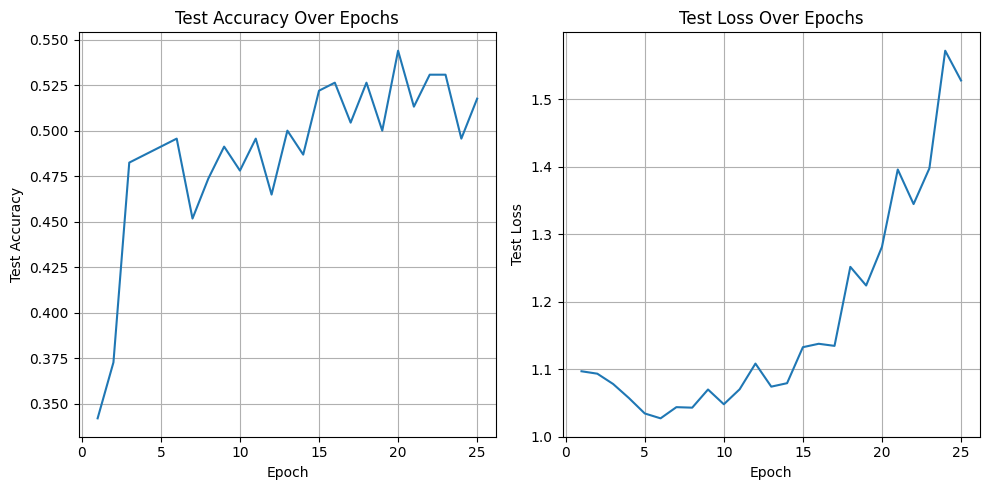

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(10,5)) # Changed figsize for better readability and corrected ncols

# Create a list of epoch numbers starting from 1
epochs_range = range(1, len(accuracies) + 1)

# Plot Accuracies
ax[0].plot(epochs_range, accuracies)
ax[0].set_xlabel("Epoch") # Use set_xlabel for Axes objects
ax[0].set_ylabel("Test Accuracy") # Use set_ylabel for Axes objects
ax[0].set_title("Test Accuracy Over Epochs") # Use set_title for Axes objects
ax[0].grid(True)

# Plot Losses
ax[1].plot(epochs_range, losses)
ax[1].set_xlabel("Epoch") # Use set_xlabel for Axes objects
ax[1].set_ylabel("Test Loss") # Use set_ylabel for Axes objects
ax[1].set_title("Test Loss Over Epochs") # Use set_title for Axes objects
ax[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


In [ ]:
# is our model better than random guessing?
from sklearn.metrics import accuracy_score
from collections import Counter

most_common_cnt = Counter(y_test).most_common()[0][1]

naive_accuracy = most_common_cnt / len(y_test) * 100
print(f"Naive Classifier Accuracy: {naive_accuracy:.2f}%")

Naive Classifier Accuracy: 35.96%


**Tracking Trials**
* Naive (Full) Accuracy: 34.32%

* Trial 1 Accuracy: 36.23%
  * BERT ~300 -> 15 -> 3
  * 100 epochs
* Trial 2 Accuracy: 34.3%
  * Roberta 768 -> 1024 -> 512 -> 3
  * 50 epochs
* Trial 3 Accuracy: 34.40%
  * Updated dataset w/ capitalization + punctuation
  * 10 epochs

* Naive (Corona) Accuracy: 35.96%

* Trial 4 Accuracy: 35.96%
  * Testing if there was a problem with the optimizer (used model instead of full_nn)
  * Also using a slice of the original dataset (only coronavirus articles)
  * Nope nothing changed (exact same accuracy as naive EVERY SINGLE EPOCH)
* Trial 5 Accuracy: 50.44%
  * Decreased learning rate (1e-5)
  * WTH!!!!! IT ACTUALLY WORKED!
  * Further subtrials with increased epochs yielded no significant changes (max of 53.51% accuracy)
  * Penalized random guessing to little avail (max of 54.39% accuracy)